# Bike Sharing Assignment Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal**:

Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# 1. Importing Libraries

In [1]:
# Numerical and Data Analysis Library
import numpy as np
import pandas as pd

# Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Utilities Library
from sklearn.model_selection import train_test_split

# Data Scaling Library
from sklearn.preprocessing import MinMaxScaler

# Recursive Feature Selection Library
from sklearn.feature_selection import RFE

# Linear Regression Model Library
from sklearn.linear_model import LinearRegression

# Multicollinearity Check Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Statiscal Modelling Library
import statsmodels.api as sm
import scipy.stats as stats

# Model Evaluation Library
from sklearn.metrics import r2_score

# Extra - To Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

# Rendering plot below cell
%matplotlib inline

# Setting style for seaborn
sns.set_palette("Set3")
sns.set_style("whitegrid")

# 2. Reading the DataSet and Understanding the Data

In [2]:
# Loading the data into a dataframe
bike_sharing_df =  pd.read_csv("day.csv")

# Printing the first 5 rows of the dataframe
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Printing the last 5 rows of the dataframe
bike_sharing_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
# Getting shape of the data
bike_sharing_df.shape

(730, 16)

In [5]:
# Getting column names of the data
bike_sharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# Getting basic statistcal information about the dataframe
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Observation**:
-  No incorrect rows as headers or footers that need to be deleted.
-  No summary rows as total or subtotal.
-  No missing column names.
-  No inconsistent column names.
-  No dispersed data. All the data in one sheet.
-  Dataset has **730 rows** and **16 columns**.

# 3. Data Cleaning

## 3.1 Percentage of Missing Values in Columns and Rows

In [7]:
# Checking column wise null percentage
col_null_percentage = pd.DataFrame(100 * bike_sharing_df.isnull().mean(), columns =['percentage_missing_values']).sort_values(by="percentage_missing_values")
print(col_null_percentage)

            percentage_missing_values
instant                           0.0
dteday                            0.0
season                            0.0
yr                                0.0
mnth                              0.0
holiday                           0.0
weekday                           0.0
workingday                        0.0
weathersit                        0.0
temp                              0.0
atemp                             0.0
hum                               0.0
windspeed                         0.0
casual                            0.0
registered                        0.0
cnt                               0.0


In [8]:
# Checking row wise null count
row_null_count = pd.DataFrame(bike_sharing_df.isnull().sum(axis=1),columns=['count_missing_values'])
print(row_null_count.value_counts())

count_missing_values
0                       730
Name: count, dtype: int64


**Observation**:
-  No missing column values.
-  No missing row values.
-  No imputation required as there are no missing values.

## 3.2 Remove Duplicate Rows

In [9]:
# Getting shape of the dataframe
bike_sharing_df.shape

(730, 16)

In [10]:
# Removing duplicate rows
bike_sharing_df = bike_sharing_df.drop_duplicates()

#Checking shape of dataframe after removing duplicates
bike_sharing_df.shape

(730, 16)

**Observation**:
- No duplicate rows in the data.

## 3.3 Removing Columns Irrelevant for Analysis

In [11]:
# Finding the number of unique values in each column and sorting them
bike_sharing_df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [12]:
# Function to print the value counts to understand the type of values in each column
def print_value_counts(df):
    for column in df.columns:
        print(f'\nValue counts for column:',df[column].value_counts())
print_value_counts(bike_sharing_df)


Value counts for column: instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64

Value counts for column: dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64

Value counts for column: season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

Value counts for column: yr
0    365
1    365
Name: count, dtype: int64

Value counts for column: mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

Value counts for column: holiday
0    709
1     21
Name: count, dtype: int64

Value counts for column: weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

Value counts for column: workingday
1    499


**Observation**:
-  **'instant'** is the record index and has all unique values, making it irrelevant for analysis.
-  **'dteday'** is the date column, which contains all unique values. Since the dataset already includes the year('yr') and month('mnth') information, we will remove the column.<br>
**Note** - Manually cross-checked the 'dteday' with the provided 'weekday' and found that the 'weekday' column is incorrectly mapped. For example, '01-01-2018' is marked as Saturday (6) but it was actually a Monday. For the analysis, we will drop the 'dteday' column and consider the other columns as correct.
-  **'causal'** and **'registered'** indicate the count for different type of users. Since our analysis focuses on the total number of users('cnt'), which includes both causal and registered users, we will remove these columns.
-  The other fields have exactly the same values as mentioned in the data dictionary and no deviation found.

In [13]:
# Dropping the above irrelevant columns for analysis
bike_sharing_df = bike_sharing_df.drop(['instant','dteday','casual','registered'],axis=1)

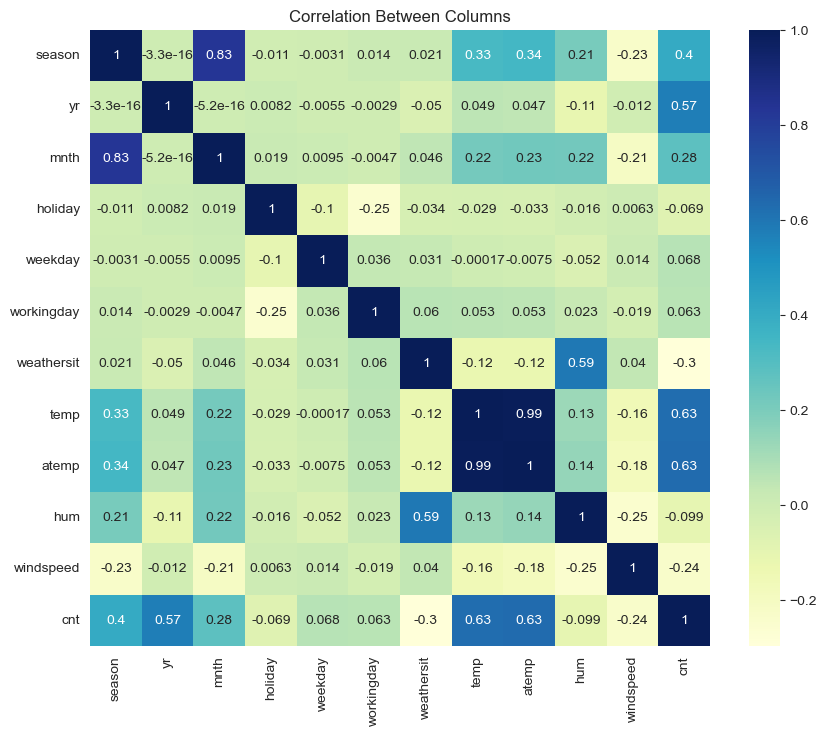

In [14]:
# Checking the correlation beween each column
corr_matrix = bike_sharing_df.corr()

# Plotting a heat map
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.title("Correlation Between Columns")
plt.show()

**Observation**:
-  **temp** and **atemp** are highly correlated with the correlation value of 0.99. It indicates multicollinearity. Hence dropping **atemp**.
-  **atemp (0.63)** and **temp (0.63)**: Both **'atemp'** (apparent temperature) and **'temp'** (actual temperature) have a strong positive correlation with the target variable, indicating that higher temperatures are associated with higher bike usage.
-  **yr (0.57)**: The year also shows a strong positive correlation, suggesting an increasing trend in bike usage over time.
-  **season (0.40)**: There is a moderate positive correlation between the season and bike usage, indicating that certain seasons have higher bike usage.
-  **mnth (0.28)**: The month shows a weak to moderate positive correlation with bike usage, suggesting some monthly variation in usage patterns.
-  **weekday (0.07**): There is a very weak positive correlation between the weekday and bike usage, implying that the day of the week has little impact on usage.
-  **workingday (0.06)**: Similar to weekday, working day status has a very weak positive correlation with bike usage.
-  **holiday (-0.07)**: There is a very weak negative correlation with holidays, indicating that bike usage slightly decreases on holidays.
-  **hum (-0.10)**: Humidity shows a weak negative correlation with bike usage, suggesting that higher humidity slightly reduces bike usage.
-  **windspeed (-0.24)**: There is a moderate negative correlation between wind speed and bike usage, indicating that higher wind speeds reduce bike usage.
-  **weathersit (-0.30)**: The weather situation has a moderate negative correlation with bike usage, suggesting that worse weather conditions (e.g., rain, snow) reduce bike usage.

In [15]:
# Dropping 'atemp' column
bike_sharing_df = bike_sharing_df.drop(['atemp'],axis=1)

## 3.4. Renaming columns for better understanding

In [16]:
# Printing the column names
bike_sharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [17]:
# Renaming the columns
bike_sharing_df = bike_sharing_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count',})

In [18]:
# Re-checking the column names
bike_sharing_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

## 3.5 Mapping the column values

In [19]:
# Mapping the season values
bike_sharing_df.season = bike_sharing_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#Mapping the month values
bike_sharing_df.month = bike_sharing_df.month.map({1:'january', 2:'february', 3:'march', 4:'april', 5:'may', 6:'june', 7:'july', 8:'august',
                                                   9:'september', 10:'october', 11:'november', 12:'december'}).astype('category')

# Mapping the weekday values
bike_sharing_df.weekday = bike_sharing_df.weekday.map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday',
                                                       6:'saturday'}).astype('category')

# Mapping the weathersit values
bike_sharing_df.weathersit = bike_sharing_df.weathersit.map({1:'clear',2:'misty',3:'light_snow_rain',4:'heavy_snow_rain'}).astype('category')

In [20]:
# Printing the first five rows of the dataframe
bike_sharing_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,january,0,saturday,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600


## 3.6 Identifying Outliers for Numerical Columns

Outliers can significantly skew statistical measures such as mean and correlation coefficients. This can affect the interpretation of relationships between variables. Hence trying to identify and remove them if required.

In [21]:
bike_sharing_df.dtypes

season          object
year             int64
month         category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
humidity       float64
windspeed      float64
count            int64
dtype: object

For outlier analysis we will focus on below continuous columns - 
-  temp  
-  humidity          
-  windspeed

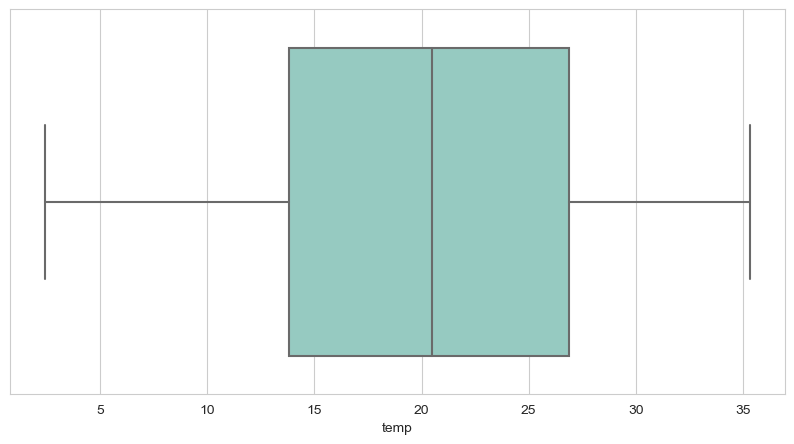

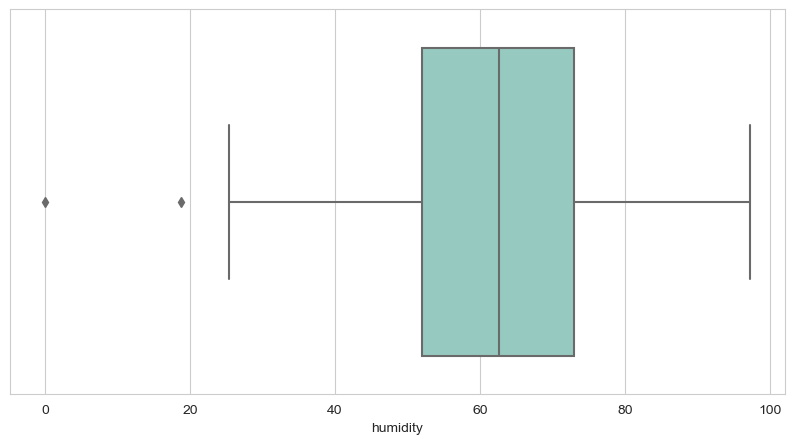

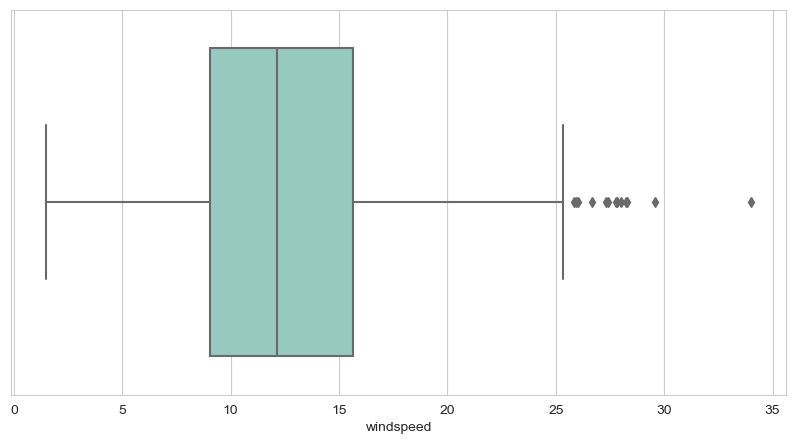

In [22]:
# Continuous Columns
continuous_cols = ['temp','humidity','windspeed'] 

# Plotting a box plot for all the continous columns
for column in continuous_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=bike_sharing_df[column])
    plt.show()

**Observation**:
- Since the maximum value in all the above continuous columns is not significantly higher than the upper fence, hence they are unlikely to have a substantial impact on the analysis.

# 4. Data Visualization

In [23]:
# Printing the column info
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   humidity    730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  count       730 non-null    int64   
dtypes: category(3), float64(3), int64(4), object(1)
memory usage: 48.8+ KB


In [24]:
# Splitting the columns as categorical and numerical columns
cat_cols =['season','year','month','holiday','weekday','workingday','weathersit']
num_cols =['temp','humidity','windspeed','count']
print(f'categorical_columns:\n{cat_cols}\n\nnumerical_columns:\n{num_cols}')

categorical_columns:
['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

numerical_columns:
['temp', 'humidity', 'windspeed', 'count']


## 4.1 Univariate Analysis

### 4.1 Univariate Analysis of Target Variable 'count'

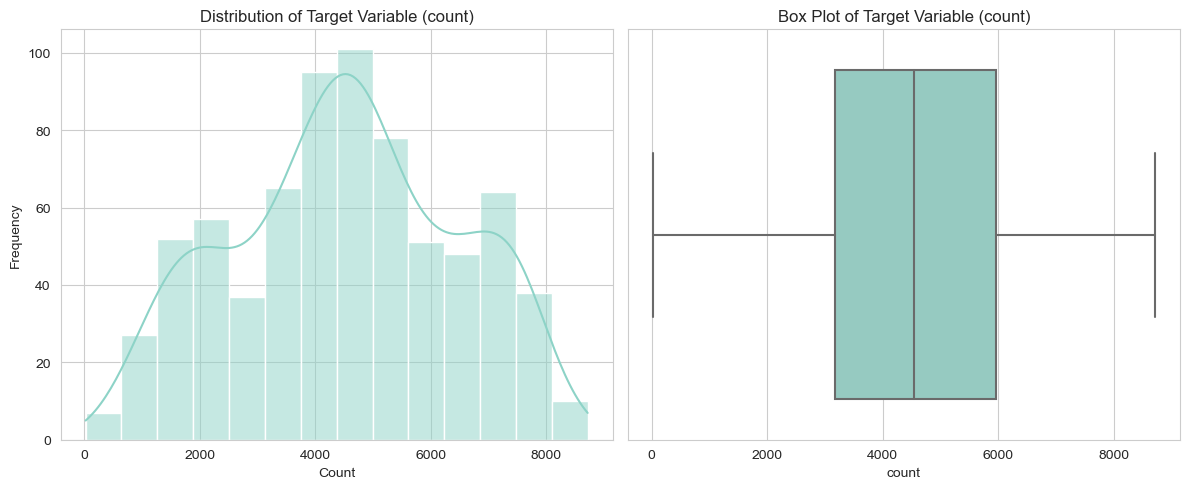

In [25]:
# Creating the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Plotting a histogram
sns.histplot(bike_sharing_df['count'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Target Variable (count)')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Frequency')

#Plotting a box plot
sns.boxplot(x=bike_sharing_df['count'],ax=ax[1])
ax[1].set_title('Box Plot of Target Variable (count)')

# Adjusting layout and showing plot
plt.tight_layout()
plt.show()

**Observation**:
-  Target variable shows a normal distrbution with 2 plateus on either side.
-  Q1 of target variable ('count') is around 3000 and Q3 is at around 6000. IQR is at around 3000.

### 4.1.2 Univariate Analysis of Numerical Columns

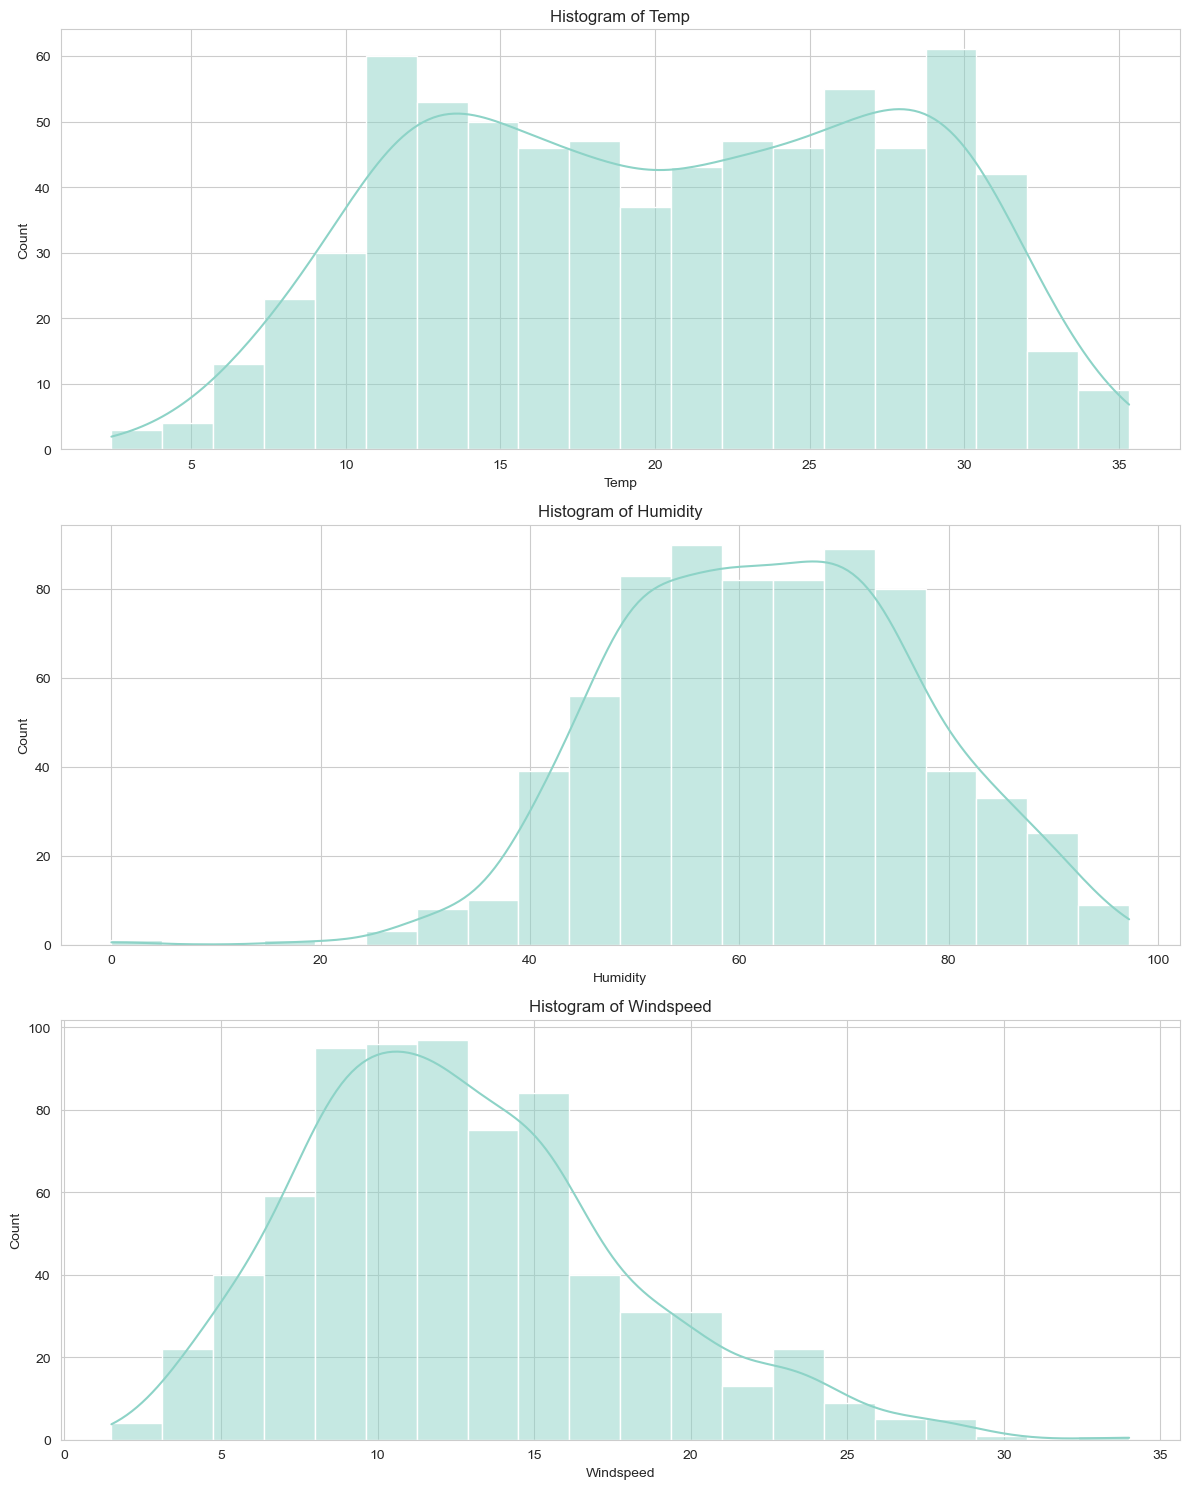

In [26]:
# Creating figure and axes for plots
fig, ax = plt.subplots(len(continuous_cols),1 , figsize=(12, 5 * len(continuous_cols)))

# Looping through each numerical column
for i, col in enumerate(continuous_cols):
    # Plot histogram
    sns.histplot(bike_sharing_df[col], kde=True,bins=20,ax=ax[i])
    ax[i].set_title(f'Histogram of {col.title()}')
    ax[i].set_xlabel(col.title())
    ax[i].set_ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

**Observation**
-  Temp is showing two peaks.
-  Windspeed is showing a right skewed plot.
-  Humidity is showing a left skewed plot.

### 4.1.3 Univariate Analysis of Categorical Columns


Percentage Distribution of season
fall      25.75
summer    25.21
spring    24.66
winter    24.38
Name: count, dtype: float64


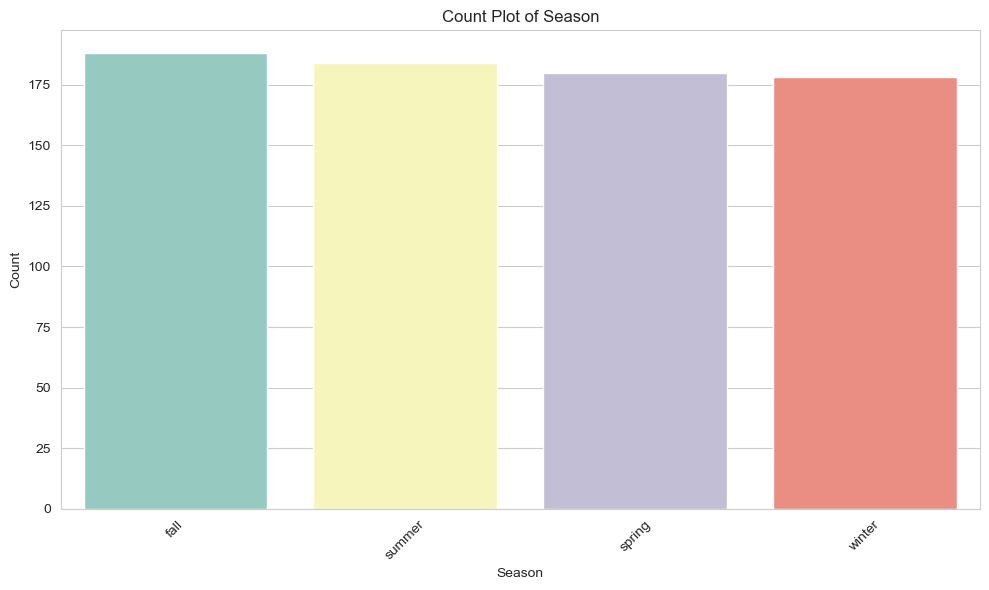


Percentage Distribution of year
0    50.0
1    50.0
Name: count, dtype: float64


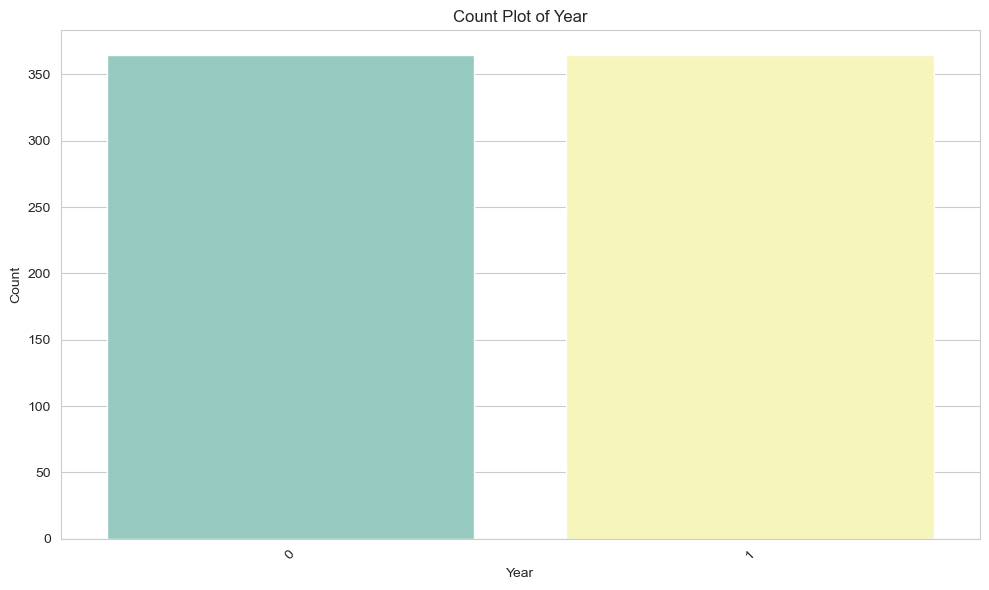


Percentage Distribution of month
august       8.49
december     8.49
january      8.49
july         8.49
march        8.49
may          8.49
october      8.49
april        8.22
june         8.22
november     8.22
september    8.22
february     7.67
Name: count, dtype: float64


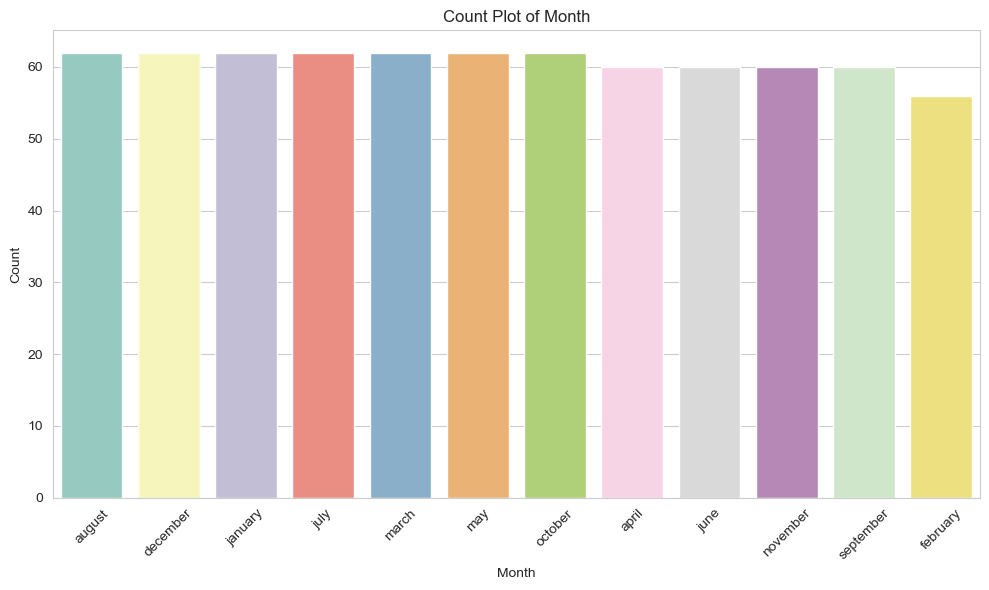


Percentage Distribution of holiday
0    97.12
1     2.88
Name: count, dtype: float64


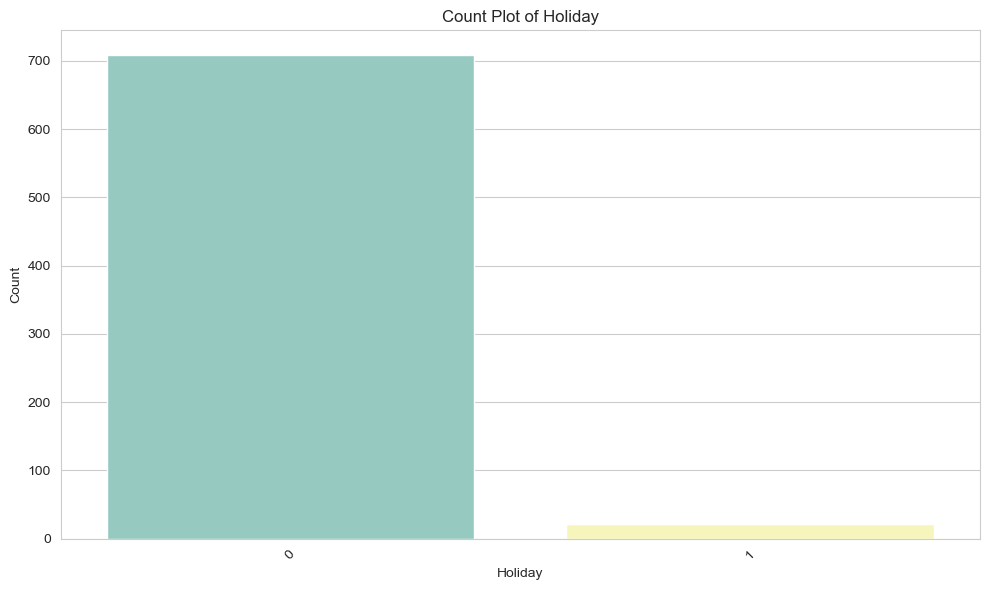


Percentage Distribution of weekday
monday       14.38
saturday     14.38
sunday       14.38
friday       14.25
thursday     14.25
tuesday      14.25
wednesday    14.11
Name: count, dtype: float64


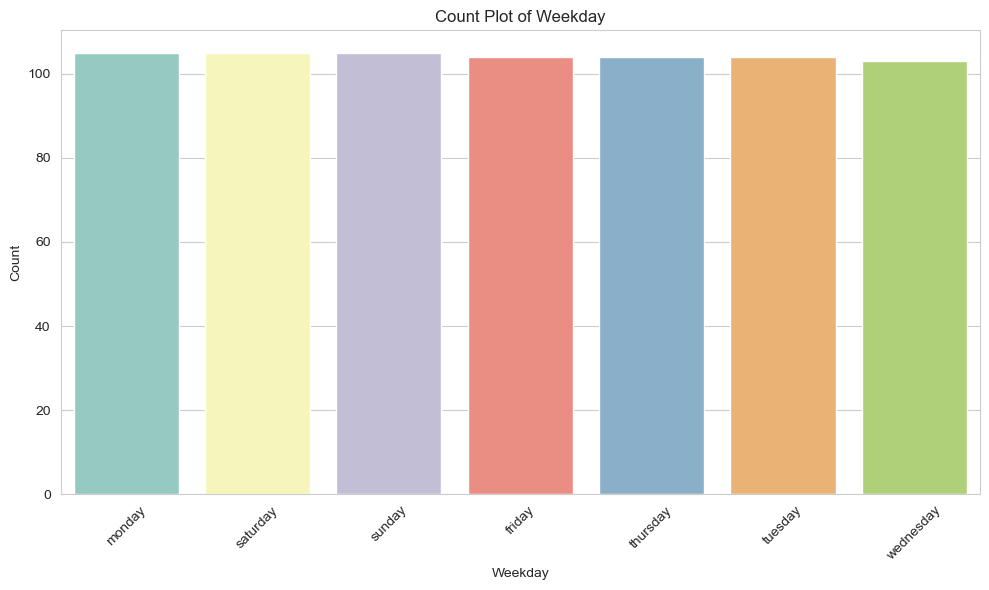


Percentage Distribution of workingday
1    68.36
0    31.64
Name: count, dtype: float64


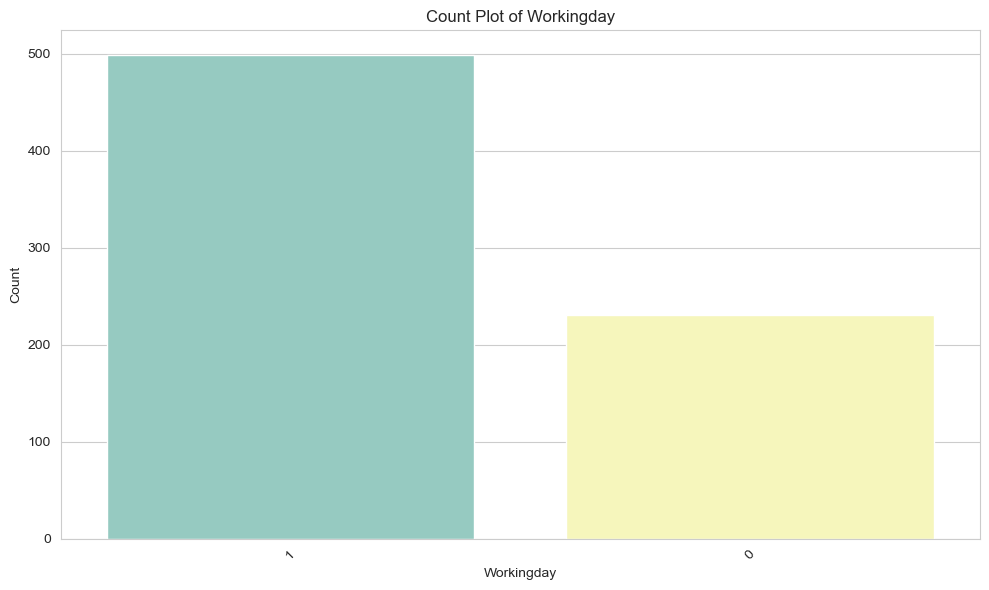


Percentage Distribution of weathersit
clear              63.42
misty              33.70
light_snow_rain     2.88
Name: count, dtype: float64


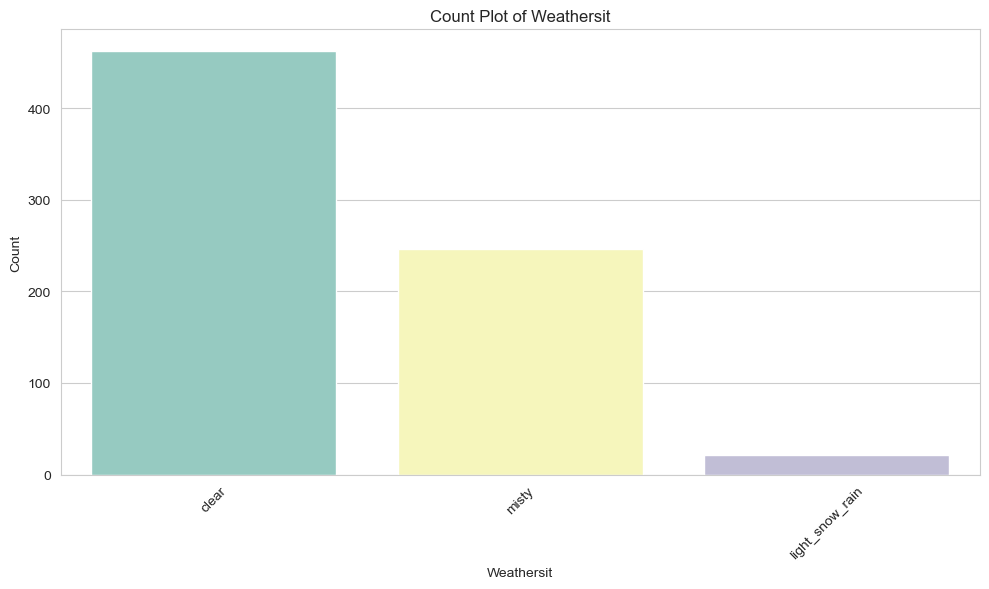

In [27]:
# Looping through all the categorical columns
for col in cat_cols:
    # Calculating the percentage distribution
    print(f'\nPercentage Distribution of {np.round((bike_sharing_df[col].value_counts() / bike_sharing_df[col].value_counts().sum()) * 100,2)}')

    # Setting figure size
    plt.figure(figsize=(10,6))
    
    # Creating a count plot
    sns.countplot(x=bike_sharing_df[col],order = bike_sharing_df[col].value_counts().index)
    
    # Setting plot labels and title
    plt.title(f'Count Plot of {col.title()}')
    plt.xlabel(col.title())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 4.2 Bivariate Analysis

### 4.2.1 Categorical Variables By Target Variable 'count'

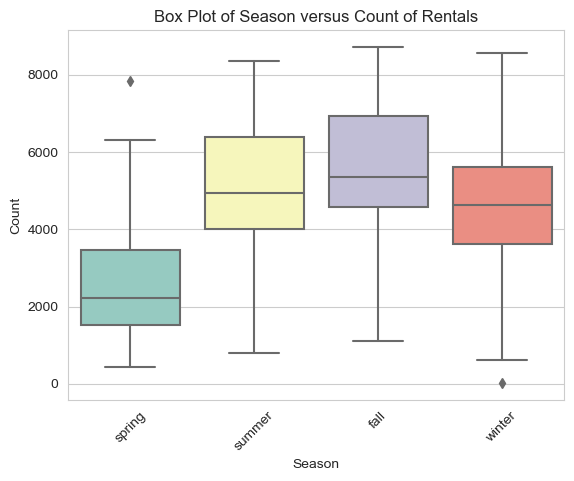

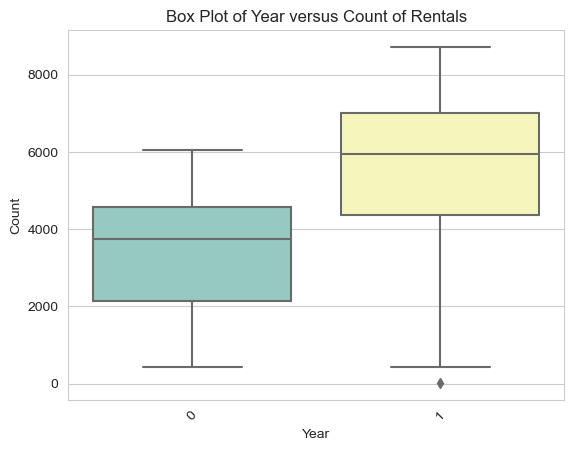

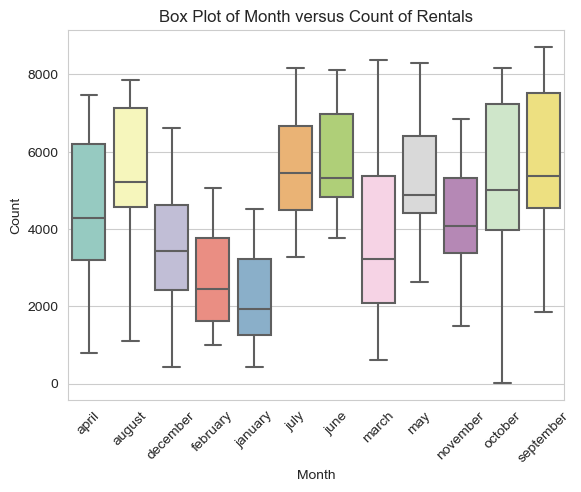

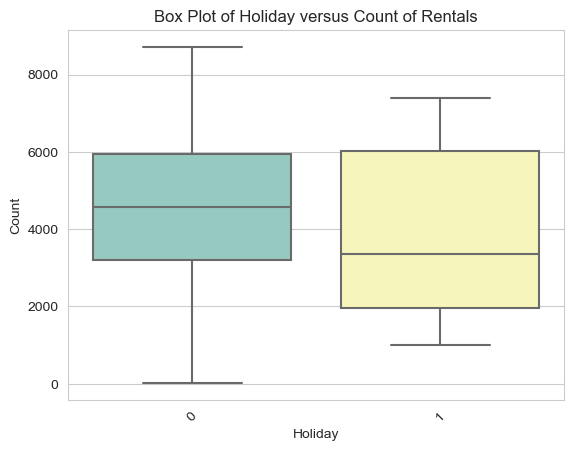

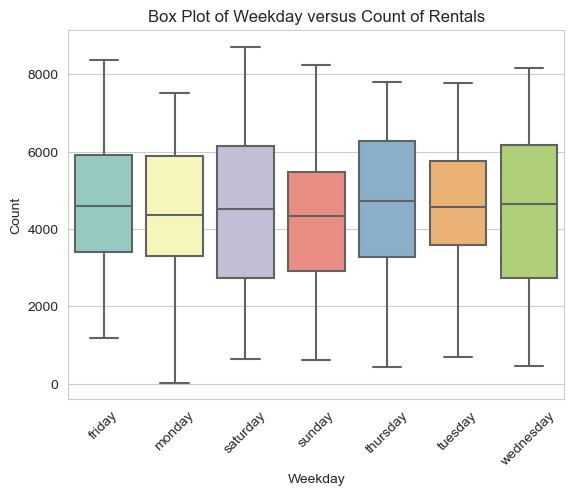

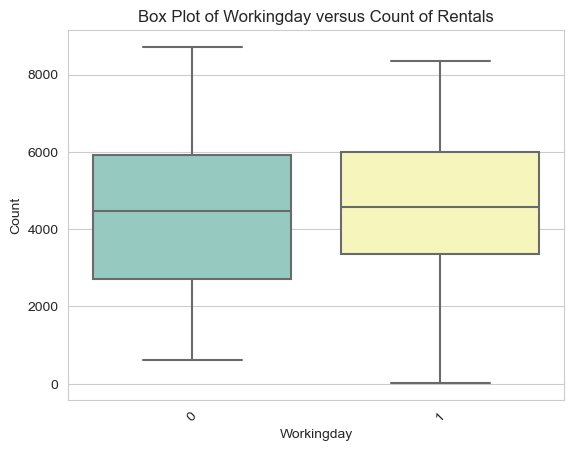

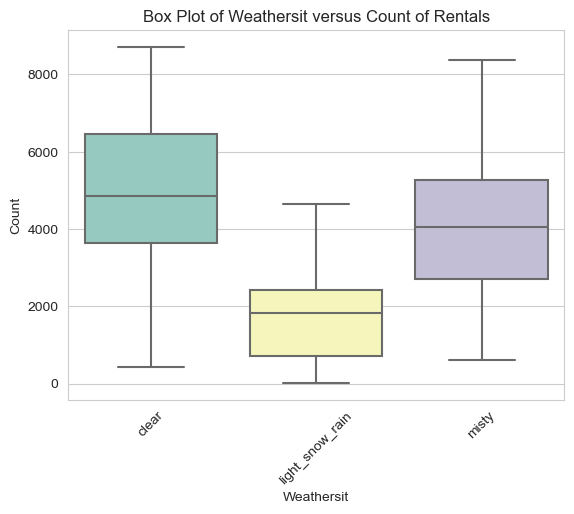

In [28]:
# Looping through each categorical column
for col in cat_cols:
    # Plot boxplot against 'count'
    sns.boxplot(x = col, y = 'count', data = bike_sharing_df)
    plt.title(f'Box Plot of {col.title()} versus Count of Rentals')
    plt.xlabel(col.title())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

**Observation**:
-  **Season**: Highest rentals are in Fall followed closely by Summer season.
-  **Year**: Number of rentals in 2019 are significantly higher than 2018
-  **Month**: Number of rentals in September are the highest. Also, June, July, August and October show good demand.
-  **Holiday and Working Day**: More number of bikes are rented on working day than holiday.
-  **Weekday**: No significant difference in rentals across weekdays is observed.
-  **Weather Situaton**: Number of rentals are higher when the weather is clear.

### 4.2.2 Bivariate Analysis on Continuous Variables

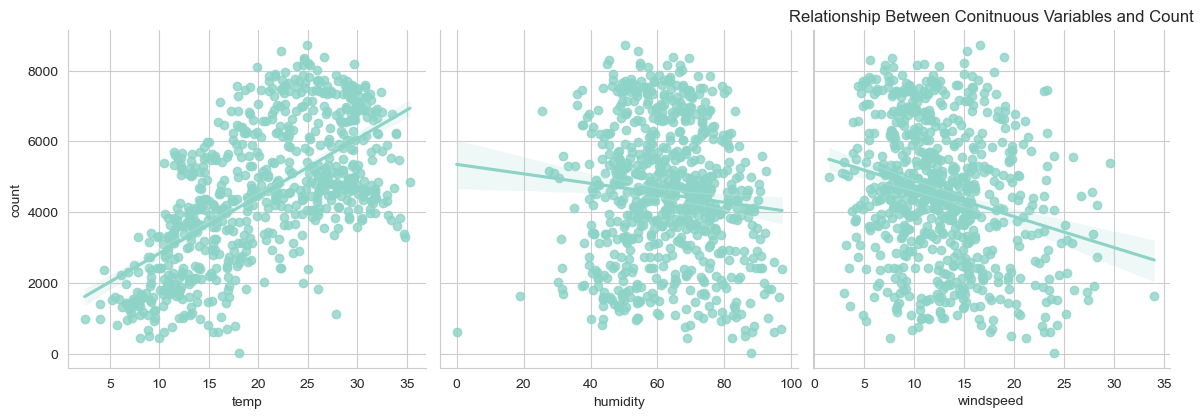

In [29]:
# Plotting a pair plot
sns.pairplot(bike_sharing_df, x_vars=continuous_cols, y_vars='count',size=4, aspect=1, kind='reg')
plt.title(f'Relationship Between Conitnuous Variables and Count')
plt.show()

**Observation**:
-  Temp is directly proportional to demand for bike.
-  Humidity and Windseed are inversely proportional to demand for bike.

## 4.3 Multivariate Analysis

### 4.3.1 Categorical Variables By Target Variable 'count' and Year

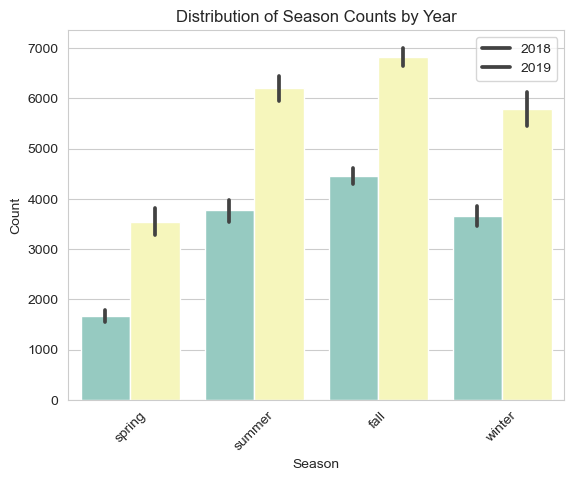

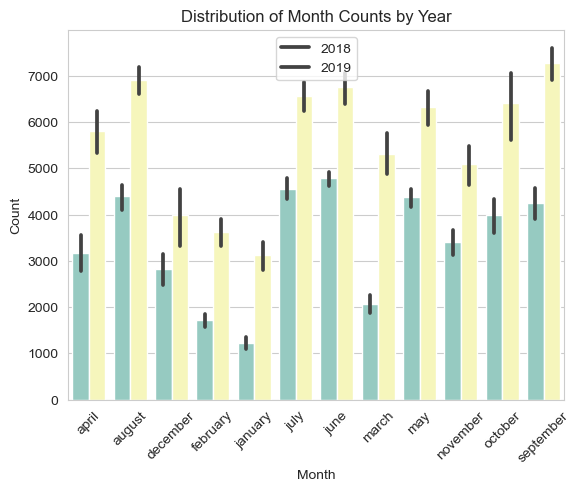

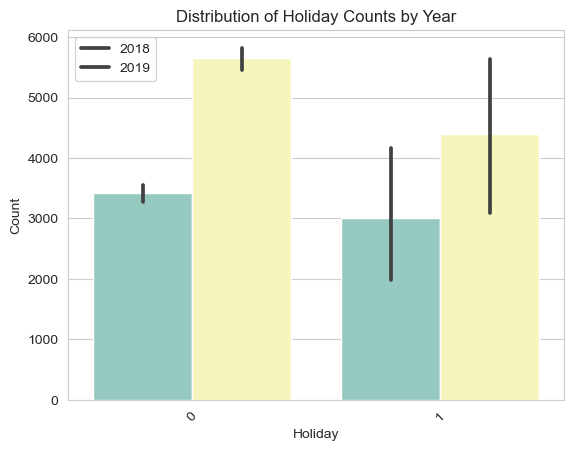

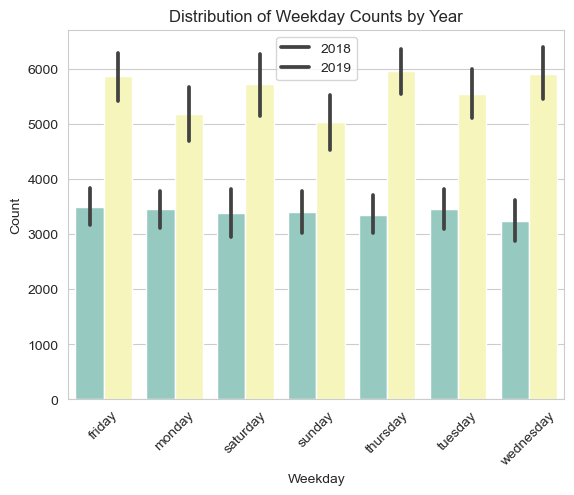

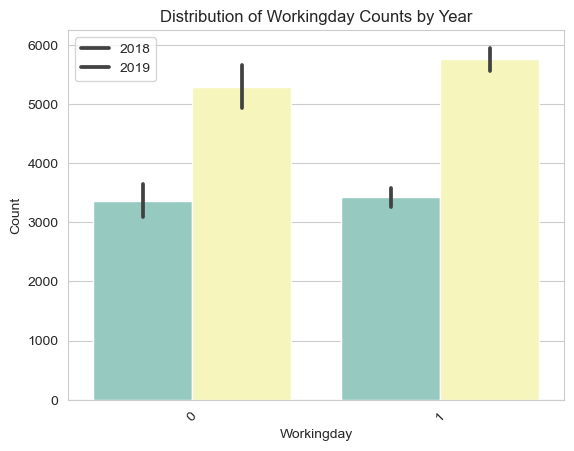

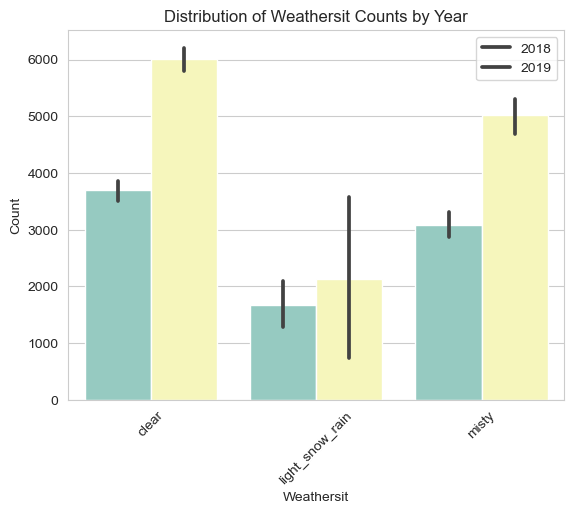

In [30]:
# Removing 'year' from categorical columns
if 'year' in cat_cols:
    cat_cols.remove('year')
# Looping through each categorical column
for col in cat_cols:
    # Plot barplot against 'count'
    sns.barplot(x=col, y='count',hue='year', data=bike_sharing_df)
    plt.title(f'Distribution of {col.title()} Counts by Year')
    plt.xlabel(col.title())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(labels=['2018', '2019'])
    plt.show()

**Observation**:
-  Booking counts have surged significantly across all seasons from 2018 to 2019. 
-  The number of bookings for each month has also risen notably from 2018 to 2019. 
-  Compared to the previous year, 2018, bookings increased for every weather situation in 2019.

### 4.3.2 Multivariate Analysis of Numerical Columns

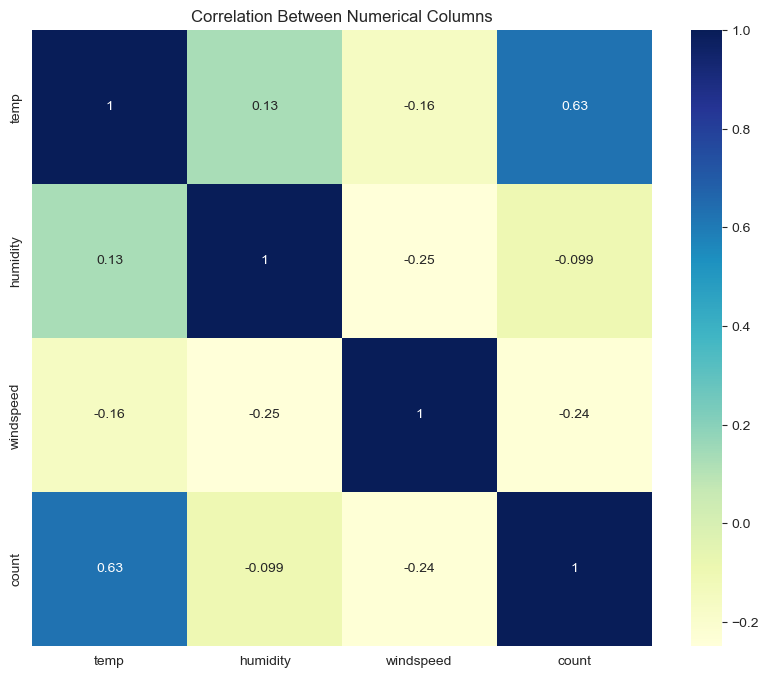

In [31]:
# Computing the correlation matrix
corr_matrix = bike_sharing_df[num_cols].corr()

# Plotting a heat map
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True, cmap="YlGnBu")
plt.title('Correlation Between Numerical Columns')
plt.show()

**Observation**:
-  **temp** is highly correlated with the target variable 'count' having the correlation value of 0.63.
-  **humidity** and **windspeed** is negatively correlated with the target variable 'count'.

# 5. Model Building

**Insights from Exploratory Data Analysis (EDA)**:

-  **Relationships with the Target Variable**:
    -  The target variable shows significant relationships with temperature, humidity, and windspeed, as evident from the plots.
    -  The target variable is also correlated with categorical variables such as weather situation, season, year, and month, as observed in the bar plots.
-  **Problem Classification**:
    -  Given the observations from EDA, this assignment is suitable for a Machine Learning approach, as we aim to predict the output variable based on historical data.
    -  This is a **Supervised Learning** problem, as we have a continuous output variable to predict.
    -  Since the target variable is continuous, this is a **Regression** problem.
    -  Considering multiple influencing factors, this problem is classified as a **Multiple Linear Regression** problem.

## 5.1 Data Pre-processing for Linear Regression

### Creating Dummy Variables for Categorical Columns

In [32]:
# Printing the first five rows
bike_sharing_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,january,0,saturday,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600


In [33]:
# Printing the value counts of categorical variables
print_value_counts(bike_sharing_df[cat_cols])


Value counts for column: season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

Value counts for column: month
august       62
december     62
january      62
july         62
march        62
may          62
october      62
april        60
june         60
november     60
september    60
february     56
Name: count, dtype: int64

Value counts for column: holiday
0    709
1     21
Name: count, dtype: int64

Value counts for column: weekday
monday       105
saturday     105
sunday       105
friday       104
thursday     104
tuesday      104
wednesday    103
Name: count, dtype: int64

Value counts for column: workingday
1    499
0    231
Name: count, dtype: int64

Value counts for column: weathersit
clear              463
misty              246
light_snow_rain     21
Name: count, dtype: int64


**Observation**:
-  'year' and 'workingday' are binary variables with values 0 and 1.

In [34]:
# Creating dummy variables for the other categorical columns
seasons_df=pd.get_dummies(bike_sharing_df.season,drop_first=True).astype(int)
months_df=pd.get_dummies(bike_sharing_df.month,drop_first=True).astype(int)
weekdays_df=pd.get_dummies(bike_sharing_df.weekday,drop_first=True).astype(int)
weathersit_df=pd.get_dummies(bike_sharing_df.weathersit,drop_first=True).astype(int)

In [35]:
# Merging the dataframe with the dummy variables
bike_sharing_df_with_dummies =pd.concat([bike_sharing_df,seasons_df,months_df,weekdays_df,weathersit_df], axis=1)

In [36]:
# Printing to first five rows of dataframe
bike_sharing_df_with_dummies.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,misty
0,spring,0,january,0,saturday,0,misty,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,january,0,sunday,0,misty,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,january,0,monday,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,january,0,tuesday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,january,0,wednesday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# Dropping the columns for which dummy variables have been created
bike_sharing_df_with_dummies = bike_sharing_df_with_dummies.drop(['season','month','weekday','weathersit'],axis=1)

In [38]:
# Printing to first five rows of dataframe
bike_sharing_df_with_dummies.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
# Checking the column names
bike_sharing_df_with_dummies.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'count', 'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'light_snow_rain', 'misty'],
      dtype='object')

In [40]:
# Checking the column info
bike_sharing_df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   humidity         730 non-null    float64
 5   windspeed        730 non-null    float64
 6   count            730 non-null    int64  
 7   spring           730 non-null    int32  
 8   summer           730 non-null    int32  
 9   winter           730 non-null    int32  
 10  august           730 non-null    int32  
 11  december         730 non-null    int32  
 12  february         730 non-null    int32  
 13  january          730 non-null    int32  
 14  july             730 non-null    int32  
 15  june             730 non-null    int32  
 16  march            730 non-null    int32  
 17  may             

**Observation**:
-  The new dataset has **730 rows** and **29 columns**.

## 5.2 Train-Test Split

In [41]:
# Splitting the data into two parts
df_train, df_test = train_test_split(bike_sharing_df_with_dummies, train_size=0.7, random_state=100)

In [42]:
# Printing shape of train data - 70% of total data
df_train.shape

(510, 29)

In [43]:
# Printing shape of test data - 30% of total data
df_test.shape

(220, 29)

## 5.3 Scaling

In [44]:
# Scaling the numerical columns
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [45]:
# Checking the head of the dataframe after scaling
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,misty
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


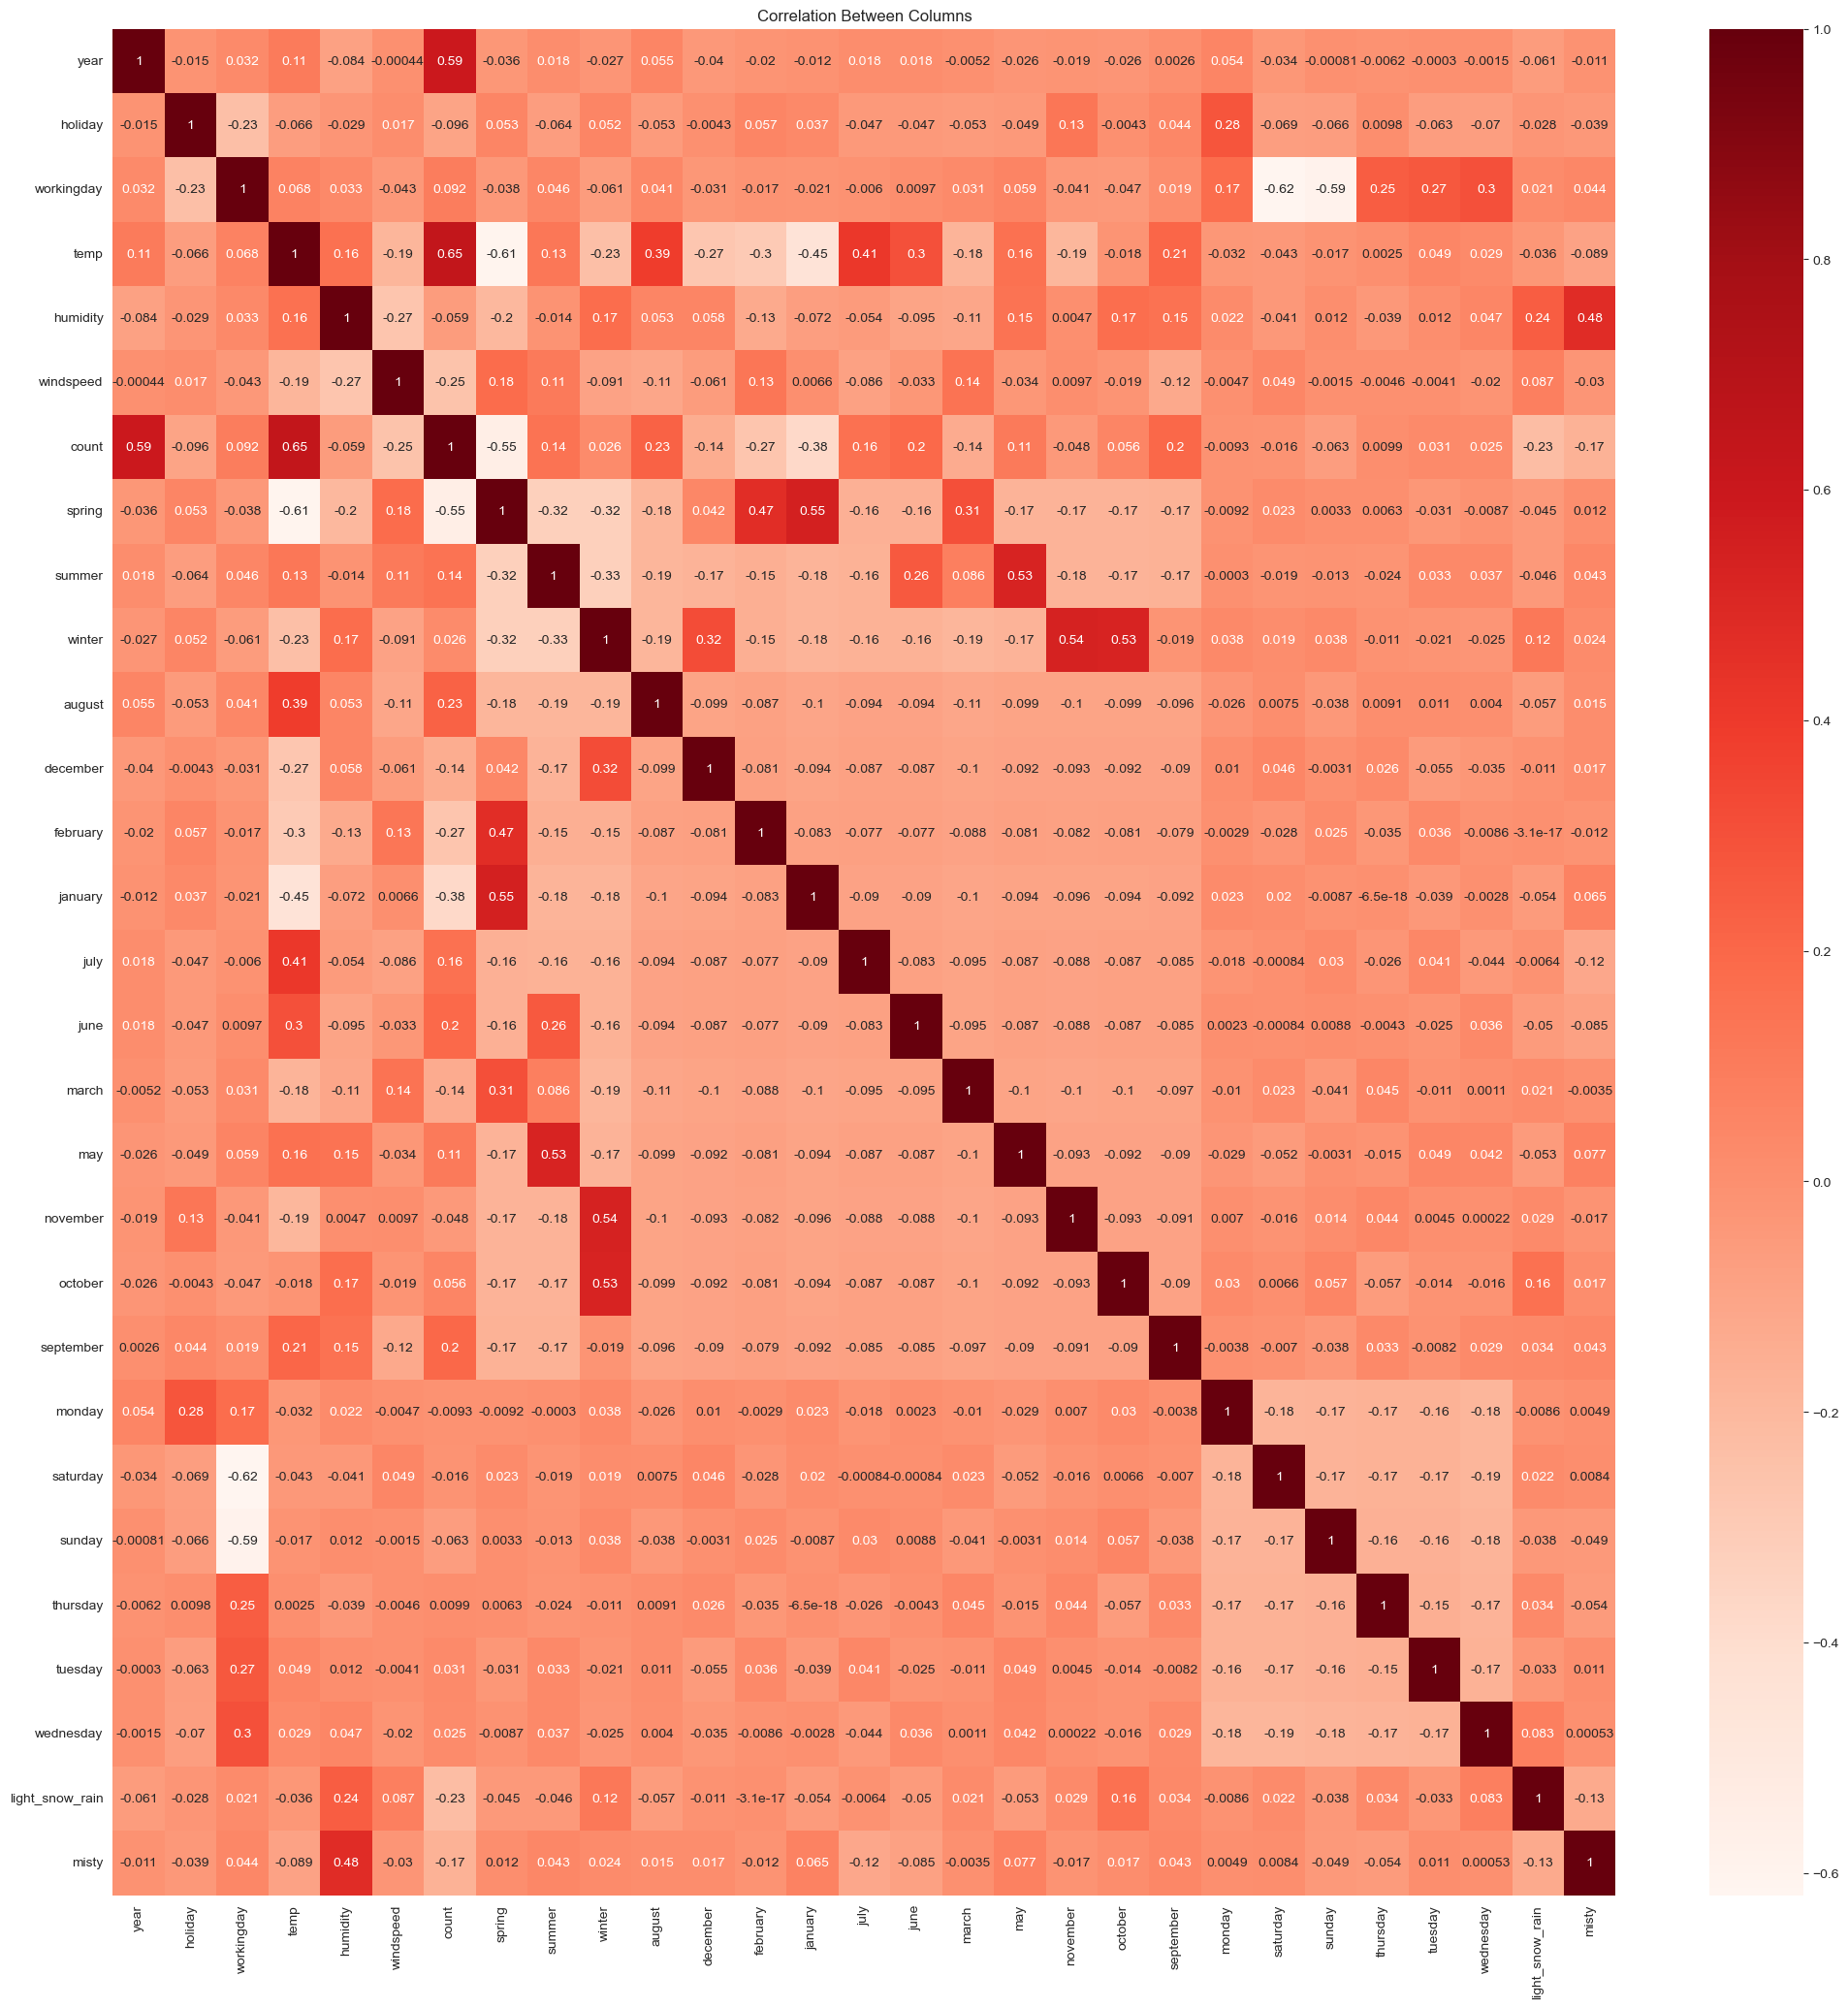

In [46]:
# Plotting a heat map to check which columns are highly correlated
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True, cmap="Reds")
plt.title('Correlation Between Columns')
plt.show()

Extracting the correlations of 'count' with all other variables, since the correlation table is very dense and not easy to read. 

In [47]:
# Calculate the correlation of 'count' with all other variables
correlation_matrix = df_train.corr()

# Extract the correlations of 'count' with all other variables
correlation_with_count = correlation_matrix['count'].drop('count')

# Sort the correlations from high to low
sorted_correlations = correlation_with_count.sort_values(ascending=False)

sorted_correlations.round(2)

temp               0.65
year               0.59
august             0.23
september          0.20
june               0.20
july               0.16
summer             0.14
may                0.11
workingday         0.09
october            0.06
tuesday            0.03
winter             0.03
wednesday          0.03
thursday           0.01
monday            -0.01
saturday          -0.02
november          -0.05
humidity          -0.06
sunday            -0.06
holiday           -0.10
march             -0.14
december          -0.14
misty             -0.17
light_snow_rain   -0.23
windspeed         -0.25
february          -0.27
january           -0.38
spring            -0.55
Name: count, dtype: float64

**Observation**:
- Temperature and year have the strongest positive correlations with the target variable. Summer, August, and September also show positive correlations but are less impactful.
-  Spring, January, and windspeed have strong negative correlations. Other features like misty conditions, light snow or rain, and holidays also show moderate negative effects.

### Helper Function

In [48]:
# Creating a function to calculate VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

## 5.4 Multiple Linear Regression By Adding All the Variables Manually

In [49]:
# Separating features and target variable from the training dataFrame
X_train = df_train 
y_train = df_train.pop("count")

In [50]:
# Adding  a constant to get an intercept
X_train_lm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train,X_train_lm).fit()

# Performing a summary operation to list out all the different parameters of the regression line fitted
print(lr.summary())
# Calculate VIF for each predictor
print('\n\033[1mVIF Calculation\033[0m\n')
print(calculate_vif(X_train))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.00e-181
Time:                        10:06:28   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2431      0.035     

**Observation**:
-  Some variables have very high VIF values and high p-values, so it's better to use Recursive Feature Elimination (RFE) to identify the most important variables.

## 5.5 Recursive Feature Elimination

In [51]:
# Initialize the linear regression estimator
estimator = LinearRegression()

# Initializing the RFE with the estimator and the number of features to select
selector = RFE(estimator, n_features_to_select=15)

# Fit the RFE selector to the training data
selector = selector.fit(X_train, y_train)

In [52]:
# Printing the selected features
selected_features= X_train.columns[selector.support_]
print(selected_features)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'july', 'september', 'saturday', 'sunday',
       'light_snow_rain', 'misty'],
      dtype='object')


In [53]:
# Printing the rejected columns
X_train.columns[~selector.support_]

Index(['august', 'december', 'february', 'january', 'june', 'march', 'may',
       'november', 'october', 'monday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [54]:
# Getting the feature rankings
ranking = selector.ranking_

# Create a DataFrame to see feature names and their ranks
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': ranking
}).sort_values(by='Ranking')

print(feature_ranking)

            Feature  Ranking
0              year        1
22           sunday        1
21         saturday        1
19        september        1
26  light_snow_rain        1
8            winter        1
7            summer        1
13             july        1
5         windspeed        1
1           holiday        1
2        workingday        1
3              temp        1
6            spring        1
27            misty        1
4          humidity        1
12          january        2
17         november        3
10         december        4
11         february        5
16              may        6
20           monday        7
9            august        8
18          october        9
24          tuesday       10
23         thursday       11
25        wednesday       12
14             june       13
15            march       14


In [55]:
# Creating a new dataframe with only the selected features from RFE
X_train_rfe=X_train[selected_features]

## 5.6 Building a Linear Model After RFE

### 5.6.1 Model 1

In [56]:
# Building 1st linear regression model
# Adding  a constant to get an intercept
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Fit the regression line using 'OLS'
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()

# Performing a summary operation to list out all the different parameters of the regression line fitted
print(lr_1.summary())
# Calculate VIF for each predictor
print('\n\033[1mVIF Calculation\033[0m\n')
print(calculate_vif(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        10:06:29   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028     

**Observation**:
- **P-Values**: The feature 'holiday' has the high p-value (0.386), indicating it is statistically insignificant. Therefore, it should be the first feature considered for removal.

In [57]:
# Dropping 'holiday' with a high p-value
X_train_new = X_train_rfe.drop(['holiday'],axis=1)

### 5.6.2 Model 2

In [58]:
# Building 2nd linear regression model
# Adding  a constant to get an intercept
X_train_lm_2 = sm.add_constant(X_train_new)

# Fit the regression line using 'OLS'
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()

# Performing a summary operation to list out all the different parameters of the regression line fitted
print(lr_2.summary())
# Calculate VIF for each predictor
print('\n\033[1mVIF Calculation\033[0m\n')
print(calculate_vif(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        10:06:29   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042     

**Observation**:
-  **P-Values**:  All the features have p-value less than 0.05.
-  **VIF**: The feature 'humidity' has the high VIF (32.10),indicating severe multicollinearity. Therefore, it should be the next feature considered for removal.

In [59]:
# Dropping 'humidity' with a high VIF
X_train_new = X_train_new.drop(['humidity'],axis=1)

### 5.6.3 Model 3

In [60]:
# Building 3rd linear regression model
# Adding  a constant to get an intercept
X_train_lm_3 = sm.add_constant(X_train_new)

# Fit the regression line using 'OLS'
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()

# Performing a summary operation to list out all the different parameters of the regression line fitted
print(lr_3.summary())
# Calculate VIF for each predictor
print('\n\033[1mVIF Calculation\033[0m\n')
print(calculate_vif(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.28e-188
Time:                        10:06:29   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1008      0.038     

**Observation**:
-  **P-Values**:  All the features have p-value less than 0.05.
-  **VIF**: The feature 'workingday' has the high VIF (16.19),indicating severe multicollinearity. Therefore, it should be the next feature considered for removal.

In [61]:
# Dropping 'workingday' with a high VIF
X_train_new = X_train_new.drop(['workingday'],axis=1)

### 5.6.4 Model 4

In [62]:
# Building 4th linear regression model
# Adding  a constant to get an intercept
X_train_lm_4 = sm.add_constant(X_train_new)

# Fit the regression line using 'OLS'
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()

# Performing a summary operation to list out all the different parameters of the regression line fitted
print(lr_4.summary())
# Calculate VIF for each predictor
print('\n\033[1mVIF Calculation\033[0m\n')
print(calculate_vif(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.06e-186
Time:                        10:06:29   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2003      0.030     

**Observation**:
- **P-Values**: The feature 'saturday' has the high p-value (0.171), indicating it is statistically insignificant. Therefore, it should be the next feature considered for removal.

In [63]:
# Dropping 'saturday' with high p-value
X_train_new = X_train_new.drop(['saturday'],axis=1)

### 5.6.5 Model 5

In [64]:
# Building 5th linear regression model
# Adding  a constant to get an intercept
X_train_lm_5 = sm.add_constant(X_train_new)

# Fit the regression line using 'OLS'
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()

# Performing a summary operation to list out all the different parameters of the regression line fitted
print(lr_5.summary())
# Calculate VIF for each predictor
print('\n\033[1mVIF Calculation\033[0m\n')
print(calculate_vif(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.37e-187
Time:                        10:06:29   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2034      0.030     

In [65]:
# Checking the parameters and their coefficient values
lr_5.params.round(4)

const              0.2034
year               0.2339
temp               0.4917
windspeed         -0.1497
spring            -0.0682
summer             0.0479
winter             0.0818
july              -0.0483
september          0.0723
sunday            -0.0450
light_snow_rain   -0.2847
misty             -0.0802
dtype: float64

In [66]:
X_train_lm_5

,const,year,temp,windspeed,spring,summer,winter,july,september,sunday,light_snow_rain,misty
576,1.0,1,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,0,0,1
111,1.0,0,0.345824,0.380981,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,0,1,0,0,0,0,1
79,1.0,0,0.462664,0.529881,0,1,0,0,0,0,0,1


**Observation**:
This model appears to be robust because:
-  There is minimal multicollinearity among the predictors.
-  The p-values for all predictors are significant.

We will consider this our final model unless the test data metrics deviate significantly from these numbers.

## 5.7 Final Model Interpretation

### Hypothesis Testing

Hypothesis testing states that:

**Null hypothesis (H0)**: B1 = B2 = ... = Bn = 0
**Alternative hypothesis (H1)**: At least one Bi ≠ 0

The final Model coefficient are :
-  const              0.2034
-  year               0.2339
-  temp               0.4917
-  windspeed         -0.1497
-  spring            -0.0682
-  summer             0.0479
-  winter             0.0818
-  july              -0.0483
-  september          0.0723
-  sunday            -0.0450
-  light_snow_rain   -0.2847
-  misty             -0.0802

It is evident that none of our coefficients are equal to zero, which means we **reject the null hypothesis**.

**F Statistics**:<br>
The F-Statistic is used to test the overall significance of the model. A higher F-Statistic indicates a more significant model.

**F-Statistic**: 230.0<br>
**Prob (F-Statistic)**: 3.37e-187

The F-Statistic value of 230.0 (which is greater than 1) and the p-value < 0.05 indicate that the overall model is highly significant.

The equation for the best-fitted model (lr_5) is:<br>
**count = 0.2034 + 0.4917 x temp + 0.2339 x year + 0.0818 x winter + 0.0723 x september + 0.0479 x summer - 0.0450 x sunday - 0.0483 x july - 0.0682 x spring - 0.0802 x misty - 0.1497 x windspeed - 0.2847 x light_snow_rain

**Interpretation of the Coefficients**:
-  **temp(0.4917)**: Higher temperatures lead to a significant increase in bike demand.
-  **year(0.2339)**: An increase from 2018 to 2019 is associated with an increase in bike demand.
-  **winter(0.0818)**: Winter season also shows an increase in bike demand.
-  **september(0.0723)**: Bike demand increases in September.
-  **summer(0.0479)**: Summer season is associated with an increase in bike demand.
-  **sunday(0.0450)**: Bike demand decreases on Sunday.
-  **july(0.0483)**: Bike demand decreases in July.
-  **spring(0.0682)**: Bike demand decreases in Spring.
-  **windspeed(-0.1497)**: Higher wind speeds decrease bike demand.
-  **light_snow_rain(-0.2847)**: Light snow or rain significantly decreases bike demand.
-  **misty(-0.0802)**: Misty weather leads to a decrease in bike demand.

<br>
Each coefficient represents the change in bike demand (count) for a one-unit change in the predictor variable, holding all other variables constant.

## 5.8 Linear Regression Assumptions

### There is a linear relationship between X and Y:

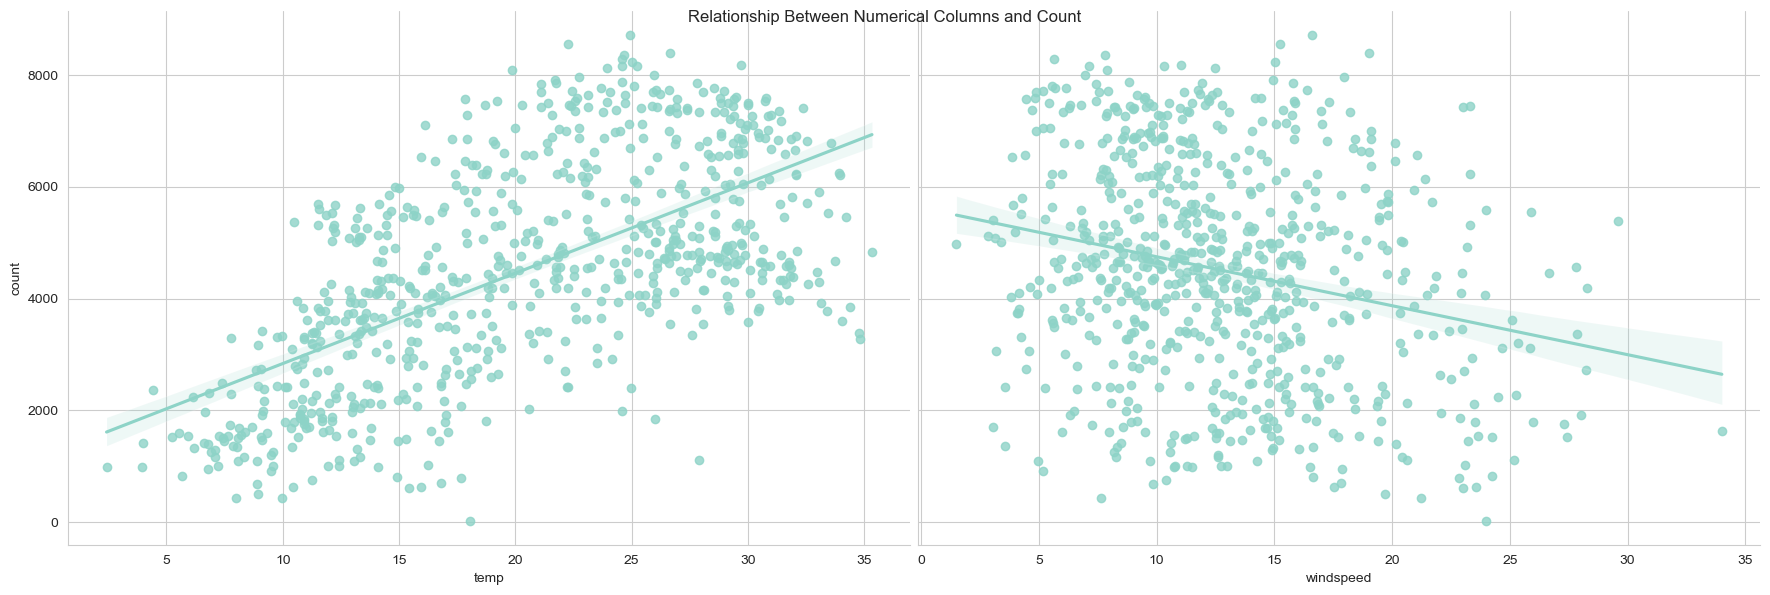

In [67]:
# Define the numerical column predictors and the target variable
num_col_predictors = ['temp', 'windspeed']

# Create the pair plot
sns.pairplot(bike_sharing_df_with_dummies, x_vars=num_col_predictors, y_vars='count', kind='reg',height=6, aspect=1.5)

# Set the title of the plot
plt.suptitle('Relationship Between Numerical Columns and Count')

# Display the plot
plt.show()

**Observation**:
-  The above plots show there is a linear relationship between the numerical columns temp and windspeed with the target variable.

### Error terms are normally distributed(not X, Y):

#### Residual Analysis of Training Data

In [68]:
# Make predictions on the training set
y_train_pred = lr_5.predict(X_train_lm_5)

# Calculate residuals: actual values - predicted values
residuals = y_train - y_train_pred

#### Distribution of the error terms

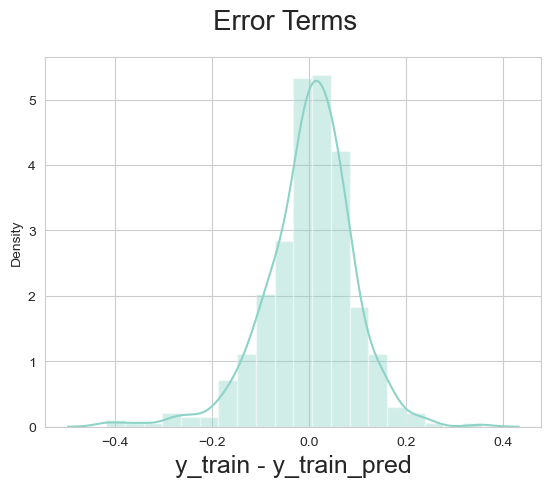

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('y_train - y_train_pred', fontsize = 18)
plt.show()

**Observation**:
-  The residuals are normally distributed. Therefore, our assumption for linear regression is valid.

### Error terms are independent of each other:

**Durbin-Watson** value of final model lr_5 is 2.019 which signifies there is no autocorrelation.

### Error terms have constant variance (homoscedasticity)

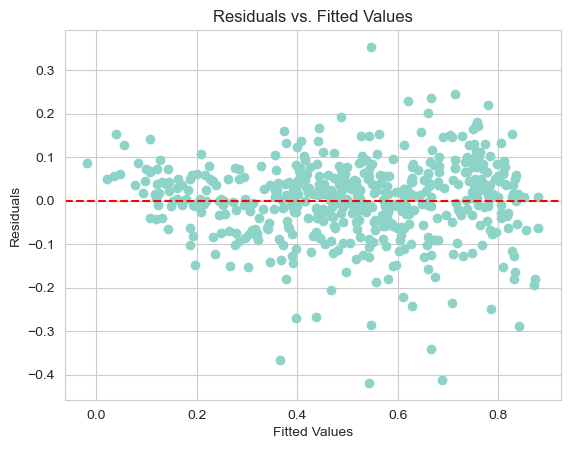

In [70]:
# Plot a scatter plot Residuals vs. Fitted Values(Predicted Values)
plt.scatter(x=y_train_pred, y= residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

**Observation**:
-  No visible pattern. 
-  Error terms are independent

### There is No Multicollinearity between the predictor variables

In [71]:
calculate_vif(X_train_new)

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,summer,2.23
3,spring,2.09
0,year,2.07
5,winter,1.80
6,july,1.59
10,misty,1.55
7,september,1.33
8,sunday,1.17


**Observation**:
-  The VIF calculation indicates that multicollinearity is not an issue among the predictor variables, as all VIF values are within the acceptable range.

## 5.9 Predictions on the Test Set

In [72]:
# Scaling the numerical columns of test set
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,misty
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
# Separating features and target variable from the test dataFrame
y_test = df_test.pop('count')
X_test = df_test

In [74]:
# Getting the column names from the new training dataframe
col1 = X_train_new.columns

# Selecting only the columns present in col1 from the test DataFrame
X_test = X_test[col1]

# Add a constant term to the test DataFrame for the intercept in the regression model
X_test_lm = sm.add_constant(X_test)

In [75]:
# Making predictions on the test data
y_pred = lr_5.predict(X_test_lm)

## 5.10  Model Evaluation

In [76]:
# Checking the R-squared on the test set
r2 = r2_score(y_test, y_pred)
print("R^2:",round(r2,2))

R^2: 0.81


In [77]:
# Printing shape of test data
X_test.shape

(220, 11)

In [78]:
# Number of observations and features
n = X_test.shape[0]
p = X_test.shape[1]

# Calculate Adjusted R^2
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R^2:", round(adjusted_r2, 2))

Adjusted R^2: 0.8


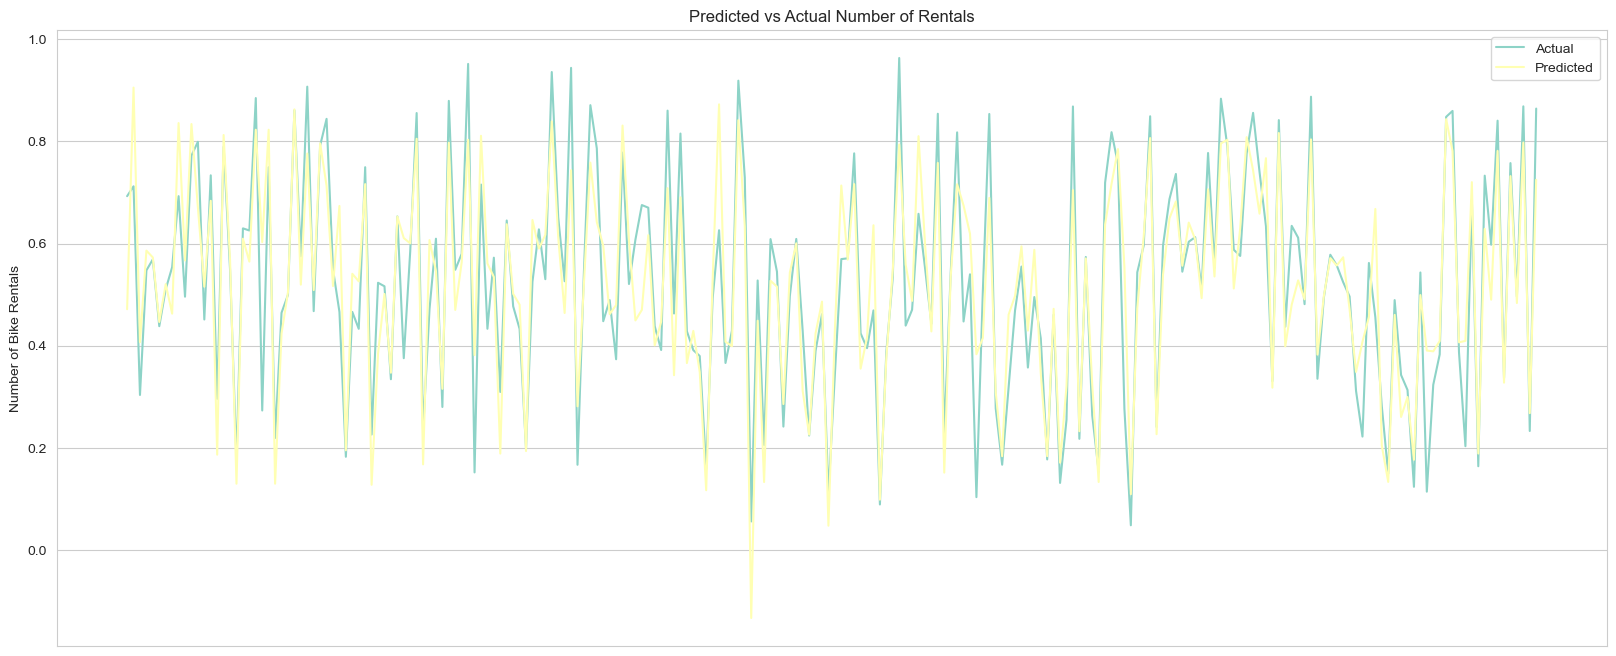

In [79]:
# Plotting Actual vs Predicted Number of Rentals over the test set
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)

# Plot actual values
l1, = ax.plot(range(len(y_test)), y_test, label='Actual')
# Plot predicted values
l2, = ax.plot(range(len(y_pred)), y_pred, label='Predicted')

# Adding legend
plt.legend()

# Adding title and labels
plt.title('Predicted vs Actual Number of Rentals')
plt.ylabel('Number of Bike Rentals')
plt.xticks([])  # Remove x-ticks for clarity
plt.show()

**Observation**:
-  The actual and predicted values closely follow each other, which indicates that the model is generally performing well. The predictions match the trend and fluctuations of the actual bike rentals.

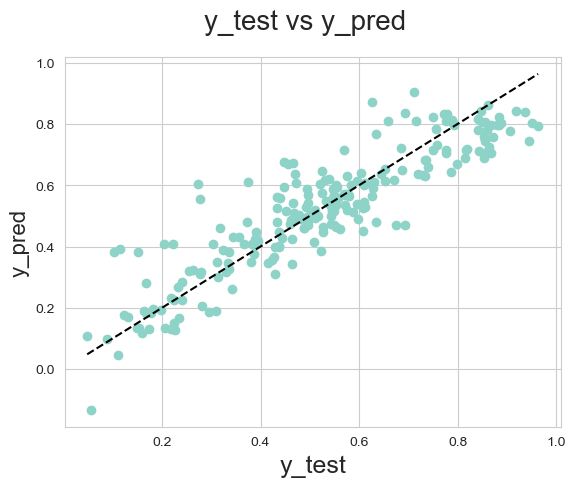

In [80]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')  # Reference line y=x
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

**Observation**:
-  There is a clear positive correlation between the actual and predicted values.

**Observation**:
-  The residual distribution is approximately normal for all test data points within the range of the training data.

## 5.11 Final Result Comparison

- **Train R^2** : 0.836
- **Train Adjusted R^2** : 0.832
- **Test R^2** : 0.81
- **Test Adjusted R^2** : 0.80

# 6. Summary

According to our final model, the top three predictor variables influencing bike bookings are:

-  **Temperature**: With a coefficient of 0.4917, a unit increase in temperature is associated with an increase of 0.4917 units in bike bookings.
- **Year**: With a coefficient of 0.2339, a unit increase in the year variable is associated with an increase of 0.2339 units in bike bookings.
-  **Weather Situation**: Light_snow_rain with a coefficient of -0.2847, a unit increase in the light_snow_rain  variable is associated with a decrease of 0.2847 units in bike bookings. Misty with a coefficient of -0.0802, a unit increase in the misty variable is associated with a decrease of 0.0802 units in bike bookings.


Other variables influencing bike bookings are:

-  **Month**: Bike demand increases in September and decreases in July.
-  **Season**: With a coefficient of 0.0818,  a unit increase in the winter variable is associated with an increase of 0.0818 units in bike bookings. With a coefficient of 0.0479,  a unit increase in the summer variable is associated with an increase of 0.0479 units in bike bookings. With a coefficient of 0.0682,  a unit decrease in the spring variable is associated with an decrease of 0.0682 units in bike bookings.
-  **Windspeed**: With a coefficient of -0.1497, a unit increase in windspeed is associated with a decrease of 0.1497 units in bike bookings.
- **Workingday**: Bike demand increases on working days.
- **Weekday**: Bike demand decreases on Sunday. 